In [141]:
import pandas as pd
import numpy as np
import warnings as wr #Ignores the warnings
wr.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('shoe.csv')

In [143]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [144]:
df.shape

(40, 2)

In [145]:
# Replace class labels with numeric values
df['class(y)'] = df['class(y)'].replace(['Female','Male'],[0,1])

In [146]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [147]:
# Separate features (x) and target variable (y)

x=df.drop('class(y)', axis=1)

In [148]:
y=df[['class(y)']]

**Logistic Regression**

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
# Train the logistic regression model

reg = LogisticRegression()

In [151]:
reg.fit(x,y)

LogisticRegression()

In [152]:
reg.coef_

array([[2.62699981]])

In [153]:
reg.intercept_

array([-26.18198935])

In [154]:
reg.predict(x)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [155]:
y.tail()

,class(y)
35,0
36,0
37,1
38,0
39,1


In [156]:
reg.predict_proba(x)

array([[0.77302845, 0.22697155],
       [0.39738242, 0.60261758],
       [0.2377457 , 0.7622543 ],
       [0.6013567 , 0.3986433 ],
       [0.05486986, 0.94513014],
       [0.8951951 , 0.1048049 ],
       [0.79524583, 0.20475417],
       [0.17003227, 0.82996773],
       [0.66235827, 0.33764173],
       [0.69665958, 0.30334042],
       [0.59504263, 0.40495737],
       [0.23301782, 0.76698218],
       [0.35729164, 0.64270836],
       [0.07737361, 0.92262639],
       [0.17757582, 0.82242418],
       [0.11860381, 0.88139619],
       [0.46492055, 0.53507945],
       [0.52395197, 0.47604803],
       [0.29398481, 0.70601519],
       [0.16274575, 0.83725425],
       [0.38176611, 0.61823389],
       [0.83473184, 0.16526816],
       [0.88221669, 0.11778331],
       [0.1392146 , 0.8607854 ],
       [0.71305157, 0.28694843],
       [0.21476669, 0.78523331],
       [0.2994667 , 0.7005333 ],
       [0.09833362, 0.90166638],
       [0.2192301 , 0.7807699 ],
       [0.11860381, 0.88139619],
       [0.

In [157]:
# Print the coefficient and intercept
print("Coefficient:", reg.coef_[0][0]) #accesses the coefficient of the logistic regression model
print("Intercept:", reg.intercept_[0]) #allows to access the intercept term

#In logistic regression, the coefficient represents the weight assigned to each feature, and the intercept represents the bias term.
#The coefficient shape is determined by the number of features in the dataset.
#In this case, it seems that we have only one feature, so the shape of reg.coef_ is (1, 1), indicating one feature and one coefficient.
#Similarly, the shape of reg.intercept_ is (1,), indicating a single intercept value.

Coefficient: 2.6269998062962943
Intercept: -26.18198934645274


In [158]:
# Test data
test_data = np.array([[0.8]])

# Predict the probabilities for the test data
predicted_probabilities = reg.predict_proba(test_data)

# Extract the predicted class label
predicted_label = reg.predict(test_data)

# Convert the predicted label to the corresponding gender
predicted_gender = "Male" if predicted_label[0] == 1 else "Female"

# Extract the probability for the predicted class label
predicted_probability = predicted_probabilities[0][predicted_label[0]]

# Print the predicted gender and probability
print(f"Predicted gender for test data 0.8: {predicted_gender}")
print(f"Probability for the predicted gender: {predicted_probability}")



Predicted gender for test data 0.8: Female
Probability for the predicted gender: 0.9999999999651646


Accuracy

In [159]:
# Obtain the predicted class labels
predicted_labels = reg.predict(x)

# Calculate the accuracy
accuracy = accuracy_score(y, predicted_labels)

print(f"Accuracy: {accuracy}")

Accuracy: 0.925


Scatter Plot

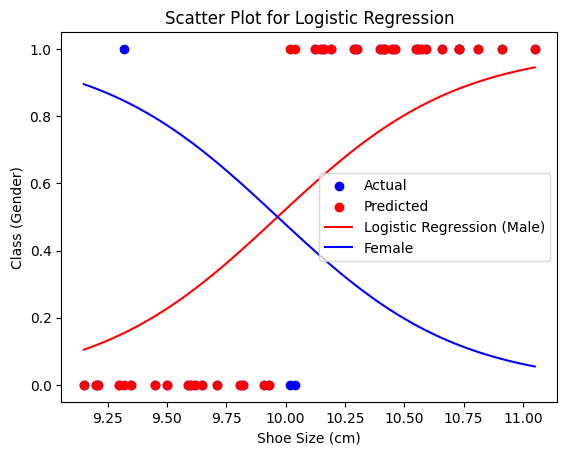

In [160]:
# Scatter plot of the data points
plt.scatter(x, y, color='blue', label='Actual')

# Scatter plot of the predicted classes
plt.scatter(x, predicted_labels, color='red', label='Predicted')

# Extract the learned parameters
coefficient = reg.coef_[0][0]
intercept = reg.intercept_[0]

# Generate a range of x values
x_range = np.linspace(min(x['size(cm)']), max(x['size(cm)']), 100)
#The linspace function creates 100 equally spaced values between the minimum and maximum values of the 'size(cm)' feature.

# Calculate probabilities for the range of x values
probs = 1 / (1 + np.exp(-(coefficient * x_range + intercept)))
#This equation calculates the probability of the positive class (Male) for each x value in the range.

probs_female = 1 - probs #for female class

# Plot the logistic regression line
plt.plot(x_range, probs, color='red', label='Logistic Regression (Male)')
#x values are the range of x values (x_range) and the y values are the calculated probabilities (probs).

plt.plot(x_range, probs_female, color='blue', label='Female')


# Set labels and title
plt.xlabel('Shoe Size (cm)')
plt.ylabel('Class (Gender)')
plt.title('Scatter Plot for Logistic Regression')

# Add legend
plt.legend()

# Show the plot
plt.show()


**Linear Regression**

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
# Create a linear regression model
linreg = LinearRegression()

In [163]:
# Fit the model to the data
linreg.fit(x, y)

LinearRegression()

In [164]:
# Predict the classes for all data points
predictions = linreg.predict(x)

In [165]:
# Print the predictions
print("Predictions:")
print(predictions)

Predictions:
[[ 0.12169012]
 [ 0.59350096]
 [ 0.80864671]
 [ 0.35570829]
 [ 1.29178101]
 [-0.14252396]
 [ 0.08394525]
 [ 0.92943028]
 [ 0.28021856]
 [ 0.23492472]
 [ 0.36325727]
 [ 0.81619568]
 [ 0.64256929]
 [ 1.18609538]
 [ 0.91433233]
 [ 1.05021386]
 [ 0.51423674]
 [ 0.44629598]
 [ 0.725608  ]
 [ 0.94452823]
 [ 0.61237339]
 [ 0.00845551]
 [-0.10477909]
 [ 0.99737104]
 [ 0.2122778 ]
 [ 0.84639157]
 [ 0.71805902]
 [ 1.11060565]
 [ 0.8388426 ]
 [ 1.05021386]
 [ 0.52933468]
 [ 0.43119803]
 [ 0.80109773]
 [ 0.18963088]
 [ 0.61992237]
 [-0.02928936]
 [-0.09723012]
 [ 0.92188131]
 [ 0.19717985]
 [-0.01419141]]


In [166]:
# Test data
test_data = np.array([[0.8]])

# Predict the values for the test data
predicted_values = linreg.predict(test_data)

# Print the predicted values
print(f"Predicted value for test data 0.8: {predicted_values[0]}")

Predicted value for test data 0.8: [-6.44591684]


In [167]:
# Convert the predictions to binary values (0 or 1)
predicted_classes = [0 if pred < 0.5 else 1 for pred in predictions]


In [168]:
# Convert the actual values to a list
actual_classes = y.values.flatten().tolist()

Accuracy

In [169]:
# Calculate the accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)

In [170]:
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.925


Scatter Plot

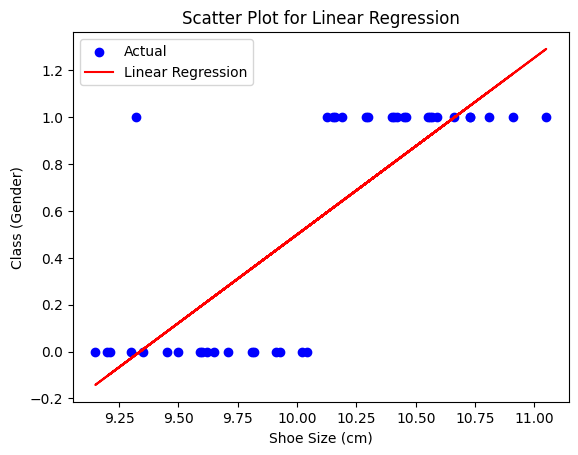

In [171]:
# Scatter plot of the data points
plt.scatter(x, y, color='blue', label='Actual')

# Plot the linear regression line
plt.plot(x, linreg.predict(x), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('Shoe Size (cm)')
plt.ylabel('Class (Gender)')
plt.title('Scatter Plot for Linear Regression')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Linear Regression vs Logistic Regression**

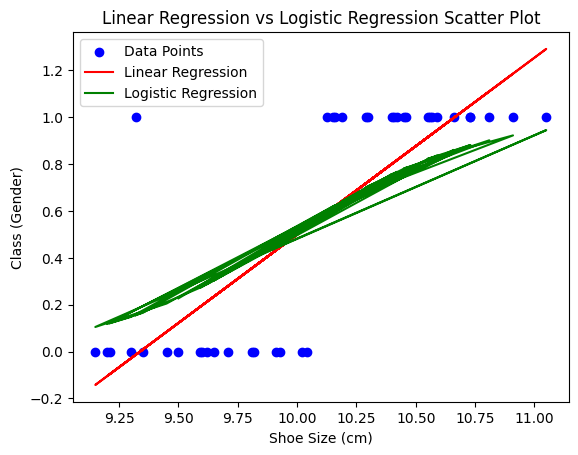

In [172]:
# Create a scatter plot of the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(x, linreg.predict(x), color='red', label='Linear Regression')

# Plot the logistic regression line
plt.plot(x, reg.predict_proba(x)[:, 1], color='green', label='Logistic Regression')

# Set labels and title
plt.xlabel('Shoe Size (cm)')
plt.ylabel('Class (Gender)')
plt.title('Linear Regression vs Logistic Regression Scatter Plot')

# Add legend
plt.legend()

# Show the plot
plt.show()
